In [ ]:
!pip install pyamg

  Obtaining dependency information for pyamg from https://files.pythonhosted.org/packages/aa/77/00666e55a314303c6b05ddb4e86dc5978be15b199f7274cb6f304cf4285d/pyamg-5.1.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.6 MB 487.6 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.6 MB 1.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.6 MB 2.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.6 MB 3.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.4/1.6 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 4.7 MB/s eta 0:00:00


In [ ]:
import sklearn
import numpy as np
import pyamg
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.model_selection import train_test_split

In [ ]:
#First data sample

np.random.seed(0)
n_points_per_cluster = 10000
C1 = [-6 ,-2] + 0.7 * np.random.randn(n_points_per_cluster,2)
C2 = [-2,2] + 0.3 * np.random.randn(n_points_per_cluster,2)
C3 = [1,-2]+0.2 * np.random.randn(n_points_per_cluster,2)
C4 = [4,-4]+0.1 * np.random.randn(n_points_per_cluster,2)
C5 = [5,0]+1.4 * np.random.randn(n_points_per_cluster,2)
C6 = [5,6]+2.0 * np.random.randn(n_points_per_cluster,2)

X = np.vstack((C1,C2,C3,C4,C5,C6))

In [ ]:
#creating y_true by known n_point_per_cluster
y_true = np.repeat(np.arange(6), n_points_per_cluster)

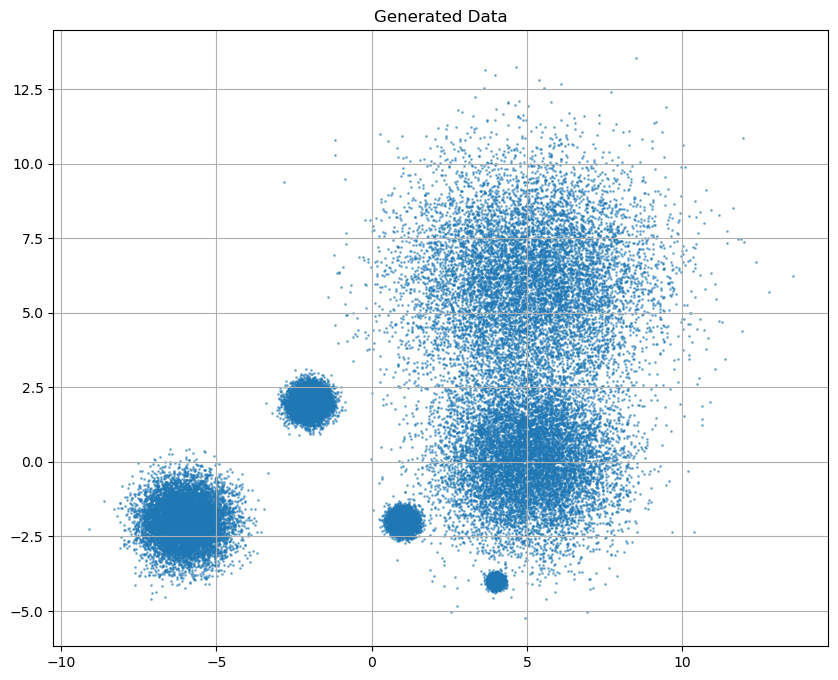

In [ ]:
#plot data

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=1, alpha=0.5)
plt.title('Generated Data')
plt.grid(True)
plt.show()

In [ ]:
#eigven_solver = 'arpack'

y_clusters = SpectralClustering(
        n_clusters=6,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42,
      ).fit_predict(X)

D:\Conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


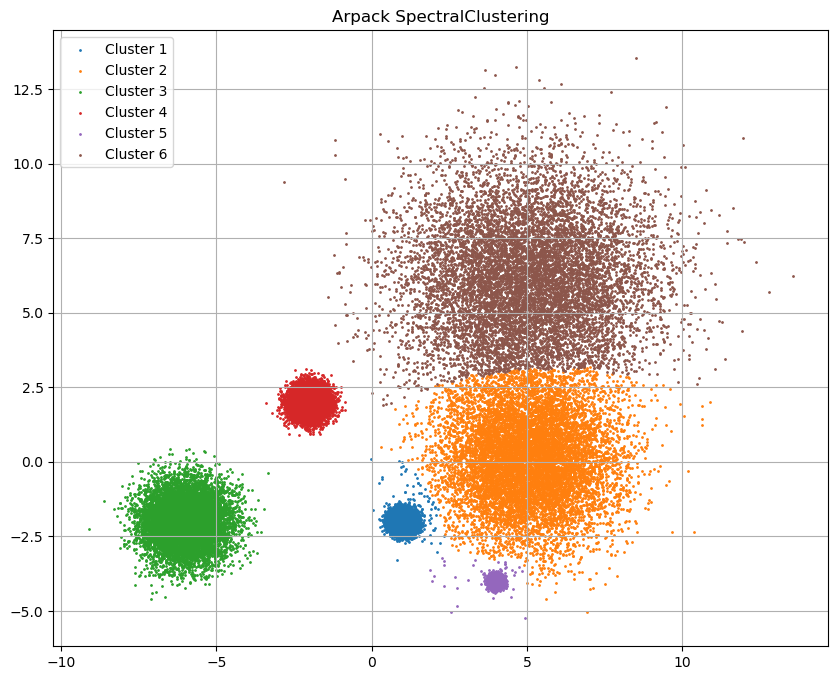

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.scatter(X[y_clusters == 4][:, 0], X[y_clusters == 4][:, 1], s=1, label='Cluster 5')
plt.scatter(X[y_clusters == 5][:, 0], X[y_clusters == 5][:, 1], s=1, label='Cluster 6')
plt.title('Arpack SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("Arpack Results")
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

Arpack Results
Homogeneity: 0.9637950899595488
Completeness: 0.9639518415982682
V-measure: 0.9638734594059049


In [ ]:
#eigen_solver = 'amg'

y_clusters = SpectralClustering(
        n_clusters=6,
        eigen_solver="amg",
        affinity="nearest_neighbors",
        random_state=42,
      ).fit_predict(X)

D:\Conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


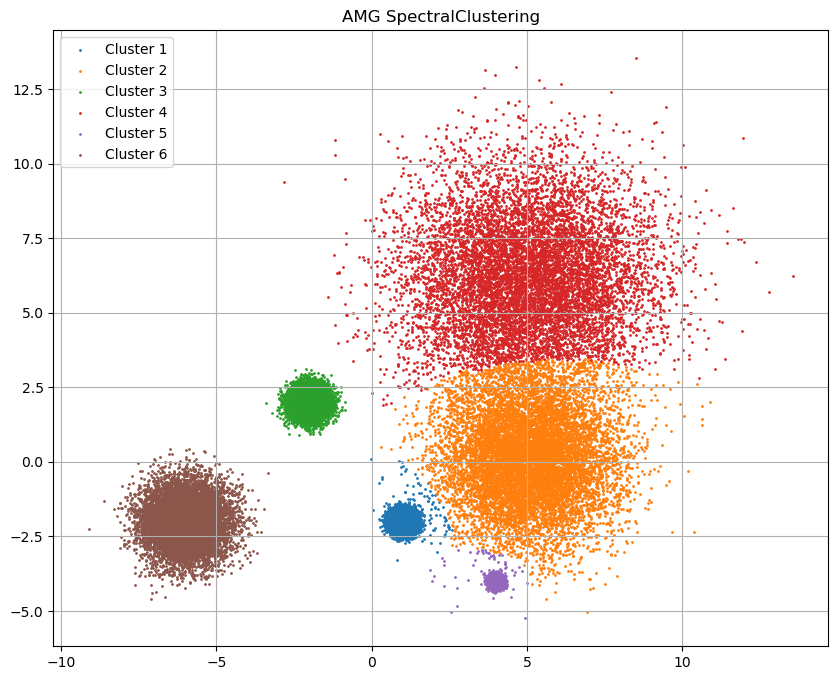

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.scatter(X[y_clusters == 4][:, 0], X[y_clusters == 4][:, 1], s=1, label='Cluster 5')
plt.scatter(X[y_clusters == 5][:, 0], X[y_clusters == 5][:, 1], s=1, label='Cluster 6')
plt.title('AMG SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("AMG Results")
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

AMG Results
Homogeneity: 0.9593909501545281
Completeness: 0.9597883198296471
V-measure: 0.9595895938540185


In [ ]:
#eigen_solver = 'lobpcg'

y_clusters = SpectralClustering(
        n_clusters=6,
        eigen_solver="lobpcg",
        affinity="nearest_neighbors",
        random_state=42,
      ).fit_predict(X)

D:\Conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 129 with accuracies 
[2.52815130e-15 8.79320664e-04 1.08569115e-03 7.49446901e-04
 1.57126604e-03 7.78685021e-04 7.40475042e-04]
not reaching the requested tolerance 0.0008940696716308594.
Use iteration 129 instead with accuracy 
0.0008292692598339504.

  _, diffusion_map = lobpcg(
D:\Conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.68213819e-15 8.79320672e-04 1.08569115e-03 7.49446896e-04
 1.57126604e-03 7.78685020e-04 7.40475042e-04]
not reaching the requested tolerance 0.0008940696716308594.
  _, diffusion_map = lobpcg(


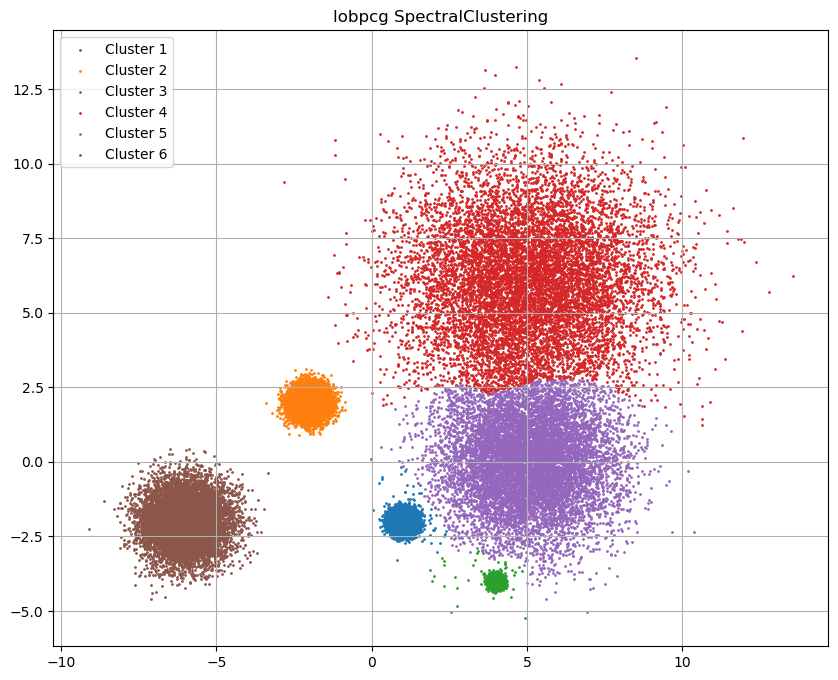

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.scatter(X[y_clusters == 4][:, 0], X[y_clusters == 4][:, 1], s=1, label='Cluster 5')
plt.scatter(X[y_clusters == 5][:, 0], X[y_clusters == 5][:, 1], s=1, label='Cluster 6')
plt.title('lobpcg SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("Logpbc Results")
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

Logpbc Results
Homogeneity: 0.9635781947348926
Completeness: 0.9635819880424307
V-measure: 0.9635800913849284


In [ ]:
###performance on subsample
subsample_size = 0.2

X_train, X_subsample, y_train, y_subsample = train_test_split(X, y_true, train_size=1-subsample_size, random_state=0)
y_sub_pred = SpectralClustering(n_clusters=6,eigen_solver = 'arpack', affinity='nearest_neighbors').fit_predict(X_subsample)

D:\Conda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


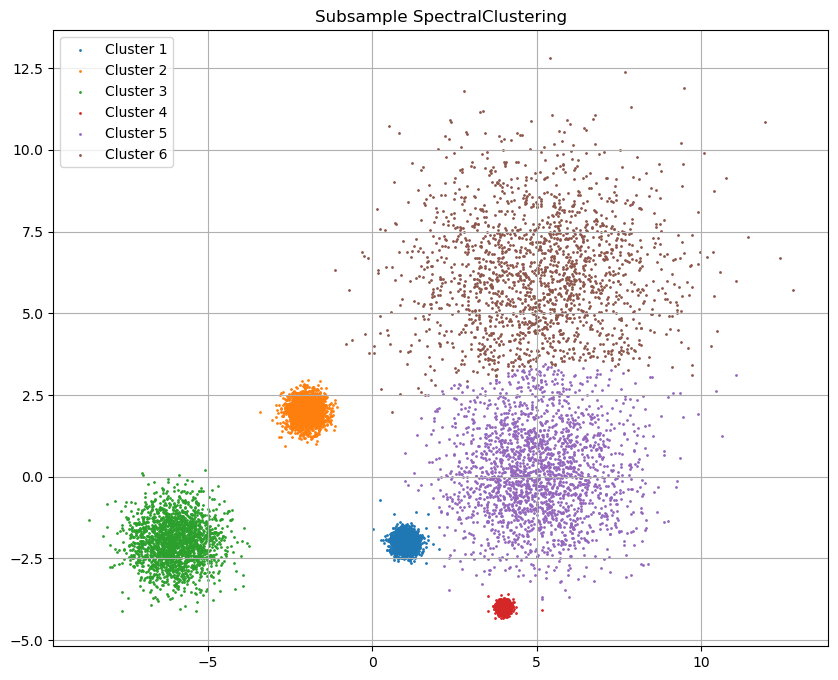

In [ ]:
#penformance on subsample plot
plt.figure(figsize=(10, 8))
plt.scatter(X_subsample[y_sub_pred == 0][:, 0], X_subsample[y_sub_pred == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X_subsample[y_sub_pred == 1][:, 0], X_subsample[y_sub_pred == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X_subsample[y_sub_pred == 2][:, 0], X_subsample[y_sub_pred == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X_subsample[y_sub_pred == 3][:, 0], X_subsample[y_sub_pred == 3][:, 1], s=1, label='Cluster 4')
plt.scatter(X_subsample[y_sub_pred == 4][:, 0], X_subsample[y_sub_pred == 4][:, 1], s=1, label='Cluster 5')
plt.scatter(X_subsample[y_sub_pred == 5][:, 0], X_subsample[y_sub_pred == 5][:, 1], s=1, label='Cluster 6')
plt.title('Subsample SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("Subsample Results")
print("Homogeneity:", homogeneity_score(y_subsample, y_sub_pred))
print("Completeness:", completeness_score(y_subsample, y_sub_pred))
print("V-measure:", v_measure_score(y_subsample, y_sub_pred))

Subsample Results
Homogeneity: 0.9650156535095227
Completeness: 0.9655886748485495
V-measure: 0.9653020791400019


In [ ]:
#Second data sample

X1,y_true=make_blobs(n_samples=40000,centers=4, cluster_std=0.60,random_state=0)

rng=np.random.RandomState(13)
X=np.dot(X1,rng.randn(2,2))

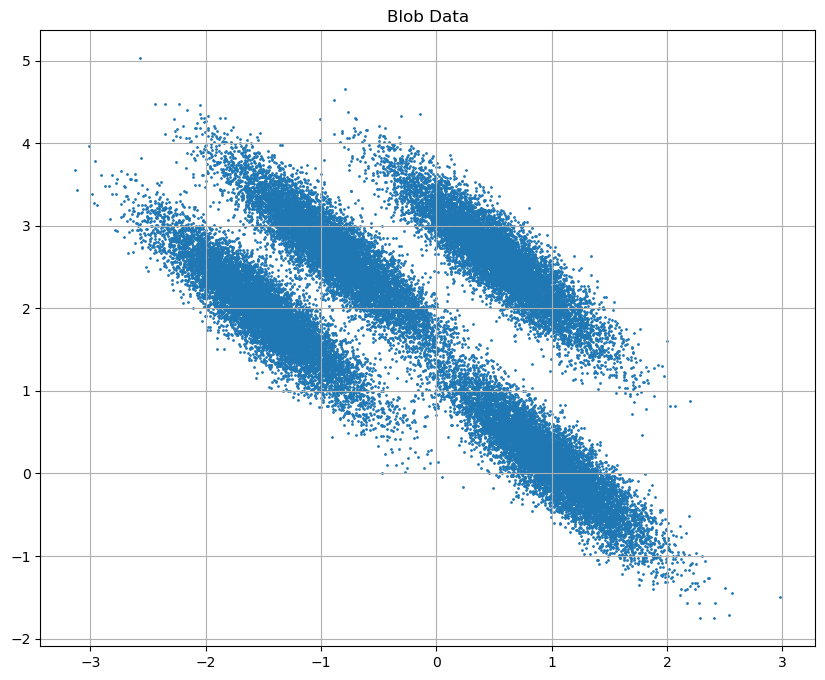

In [ ]:
#plot data

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.grid(True)
plt.title('Blob Data')
plt.show()

In [ ]:
#n_clusters = 4, eigen_solver = 'arpack'
y_clusters = SpectralClustering(
        n_clusters=4,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42
      ).fit_predict(X)

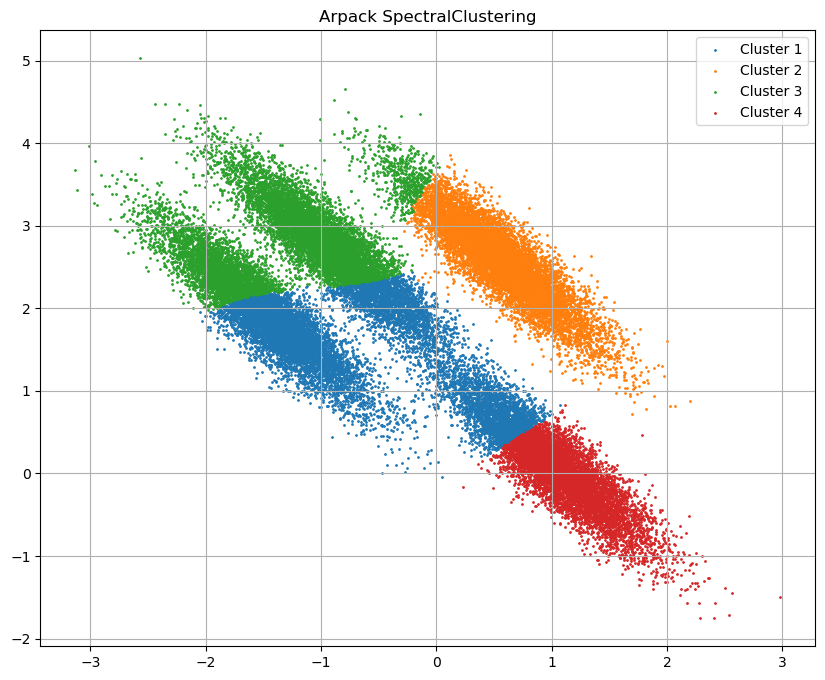

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.title('Arpack SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("Arpack Results")
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

Arpack Results
Homogeneity: 0.6150647790754081
Completeness: 0.6237698972460495
V-measure: 0.6193867533362105


In [ ]:
#n_clusters = 4, eigen_solver = 'amg'

y_clusters = SpectralClustering(
        n_clusters=4,
        eigen_solver="amg",
        affinity="nearest_neighbors",
        random_state=42
      ).fit_predict(X)

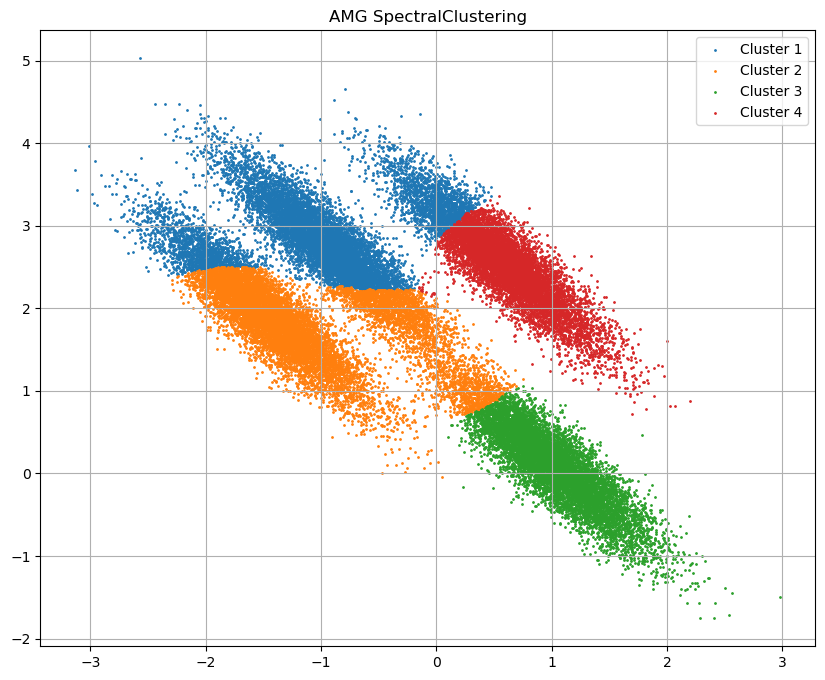

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.title('AMG SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("AMG Results")
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

AMG Results
Homogeneity: 0.6713896750914969
Completeness: 0.6768278588392825
V-measure: 0.6740977992091743


In [ ]:
#n_clusters = 8, eigen_solver = 'amg'
y_clusters = SpectralClustering(
        n_clusters=8,
        eigen_solver="amg",
        affinity="nearest_neighbors",
        random_state=42
      ).fit_predict(X)

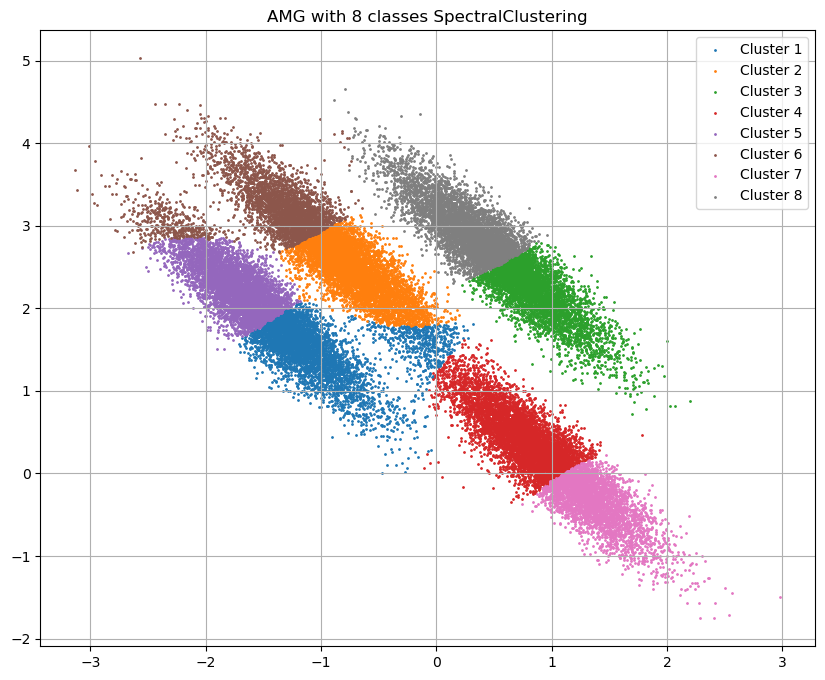

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.scatter(X[y_clusters == 4][:, 0], X[y_clusters == 4][:, 1], s=1, label='Cluster 5')
plt.scatter(X[y_clusters == 5][:, 0], X[y_clusters == 5][:, 1], s=1, label='Cluster 6')
plt.scatter(X[y_clusters == 6][:, 0], X[y_clusters == 6][:, 1], s=1, label='Cluster 7')
plt.scatter(X[y_clusters == 7][:, 0], X[y_clusters == 7][:, 1], s=1, label='Cluster 8')
plt.title('AMG with 8 classes SpectralClustering')
plt.legend()
plt.grid(True)
plt.show()

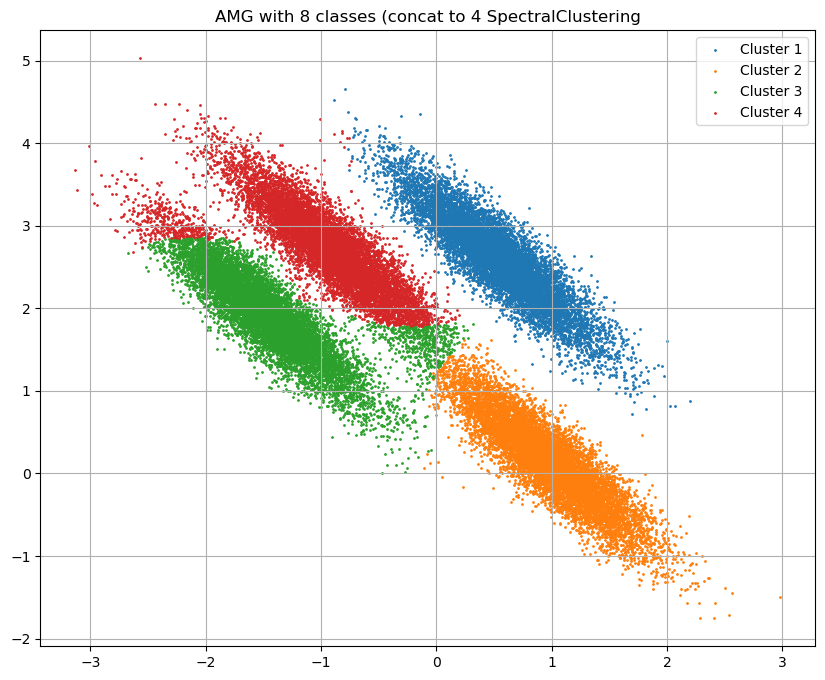

In [ ]:
#manualy change group of colors to one color
y_clusters = np.where(y_clusters == 7, 8, y_clusters)
y_clusters = np.where(y_clusters == 2, 8, y_clusters)
y_clusters = np.where(y_clusters == 3, 9, y_clusters)
y_clusters = np.where(y_clusters == 6, 9, y_clusters)
y_clusters = np.where(y_clusters == 0, 10, y_clusters)
y_clusters = np.where(y_clusters == 4, 10, y_clusters)
y_clusters = np.where(y_clusters == 1, 11, y_clusters)
y_clusters = np.where(y_clusters == 5, 11, y_clusters)

y_clusters = y_clusters - 8

plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.title('AMG with 8 classes (concat to 4 SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print('AMG with 8 classes (concat to 4) SpectralClustering')
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

AMG with 8 classes (concat to 4) SpectralClustering
Homogeneity: 0.9105509933886711
Completeness: 0.9105603810831004
V-measure: 0.9105556872116893


In [ ]:
#n_clusters = 8, eigen_solver = 'arpack'
y_clusters = SpectralClustering(
        n_clusters=8,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42
      ).fit_predict(X)

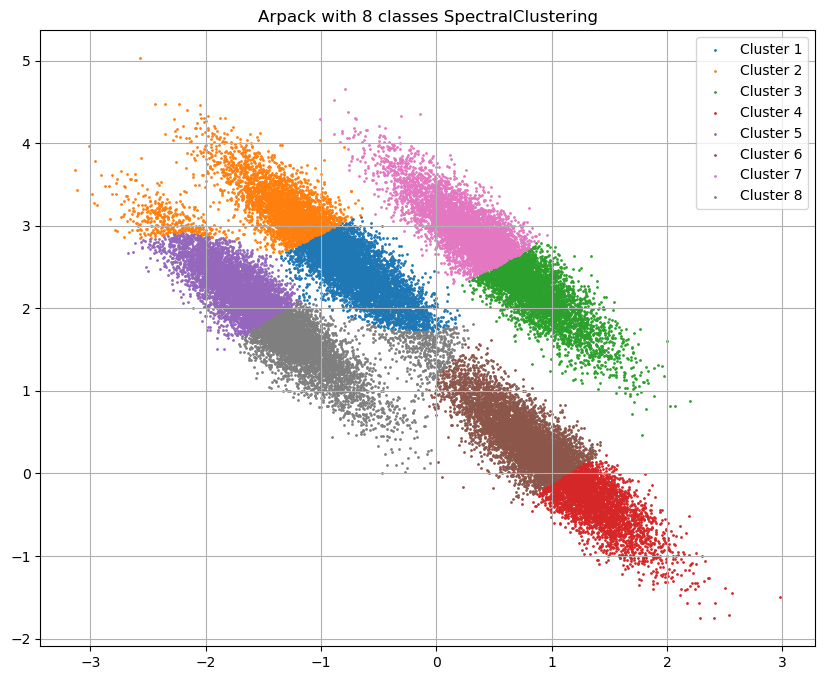

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.scatter(X[y_clusters == 4][:, 0], X[y_clusters == 4][:, 1], s=1, label='Cluster 5')
plt.scatter(X[y_clusters == 5][:, 0], X[y_clusters == 5][:, 1], s=1, label='Cluster 6')
plt.scatter(X[y_clusters == 6][:, 0], X[y_clusters == 6][:, 1], s=1, label='Cluster 7')
plt.scatter(X[y_clusters == 7][:, 0], X[y_clusters == 7][:, 1], s=1, label='Cluster 8')
plt.title('Arpack with 8 classes SpectralClustering')
plt.grid(True)
plt.legend()
plt.show()

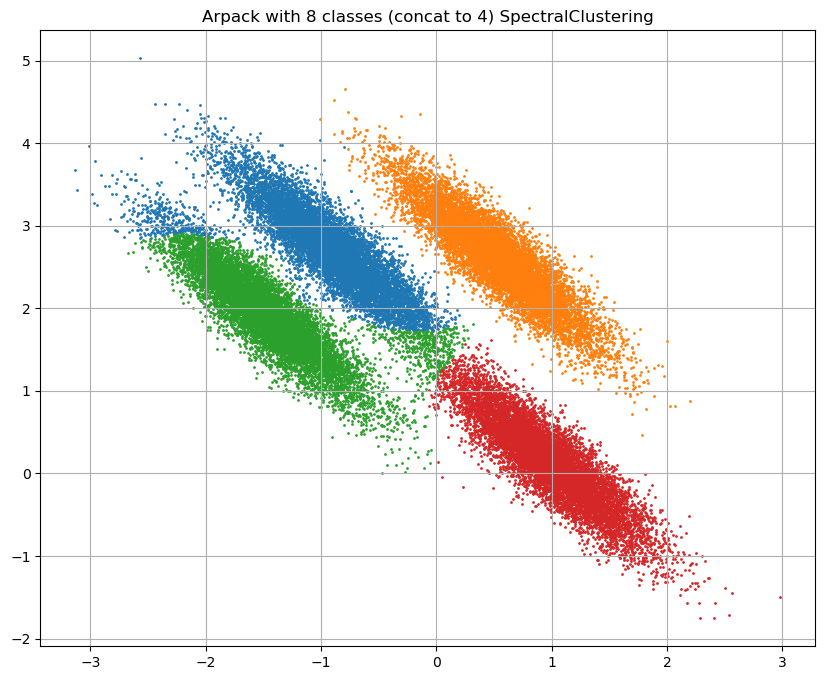

In [ ]:
#manualy change group of colors to one color
y_clusters = np.where(y_clusters == 0, 8, y_clusters)
y_clusters = np.where(y_clusters == 1, 8, y_clusters)
y_clusters = np.where(y_clusters == 2, 9, y_clusters)
y_clusters = np.where(y_clusters == 6, 9, y_clusters)
y_clusters = np.where(y_clusters == 7, 10, y_clusters)
y_clusters = np.where(y_clusters == 4, 10, y_clusters)
y_clusters = np.where(y_clusters == 5, 11, y_clusters)
y_clusters = np.where(y_clusters == 3, 11, y_clusters)

y_clusters = y_clusters - 8

plt.figure(figsize=(10, 8))
plt.scatter(X[y_clusters == 0][:, 0], X[y_clusters == 0][:, 1], s=1, label='Cluster 1')
plt.scatter(X[y_clusters == 1][:, 0], X[y_clusters == 1][:, 1], s=1, label='Cluster 2')
plt.scatter(X[y_clusters == 2][:, 0], X[y_clusters == 2][:, 1], s=1, label='Cluster 3')
plt.scatter(X[y_clusters == 3][:, 0], X[y_clusters == 3][:, 1], s=1, label='Cluster 4')
plt.title('Arpack with 8 classes (concat to 4) SpectralClustering')
plt.grid(True)
plt.show()

In [ ]:
print("Arpack with 8 classes (concat to 4) SpectralClustering")
print("Homogeneity:", homogeneity_score(y_true, y_clusters))
print("Completeness:", completeness_score(y_true, y_clusters))
print("V-measure:", v_measure_score(y_true, y_clusters))

Arpack with 8 classes (concat to 4) SpectralClustering
Homogeneity: 0.9190014970126585
Completeness: 0.9190197637149317
V-measure: 0.9190106302730257


In [ ]:
#evaluate the speed of the method on thw initial dataset

import time

X1, y_true = make_blobs(n_samples = 40000,centers = 4, cluster_std = 0.60,random_state = 0)

rng=np.random.RandomState(13)
X=np.dot(X1,rng.randn(2,2))

start = time.time()

y_clusters = SpectralClustering(
        n_clusters=8,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42
        ).fit_predict(X)


end = time.time() - start
print(end)

29.912930488586426


In [ ]:
#evaluate the speed of the method on the large dataset

import time

X1, y_true = make_blobs(n_samples = 400000,centers = 4, cluster_std = 0.60,random_state = 0)

rng=np.random.RandomState(13)
X=np.dot(X1,rng.randn(2,2))

start = time.time()

y_clusters = SpectralClustering(
        n_clusters=8,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42
        ).fit_predict(X)


end = time.time() - start
print(end)

2954.4142084121704
